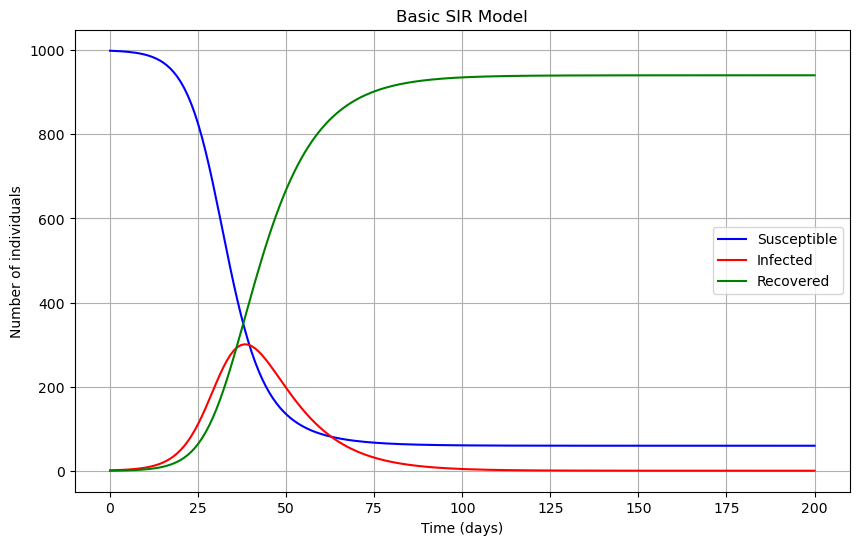

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
beta = 0.3  # infection rate
gamma = 0.1  # recovery rate
N = 1000    # total population
I0 = 1      # initial number of infected individuals
R0 = 0      # initial number of recovered individuals
S0 = N - I0 - R0  # initial number of susceptible individuals

# SIR model differential equations
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Time vector
t = np.linspace(0, 200, 200)  # 200 days

# Integrate the SIR equations over the time grid t
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered')
plt.title('Basic SIR Model')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.grid(True)
plt.show()


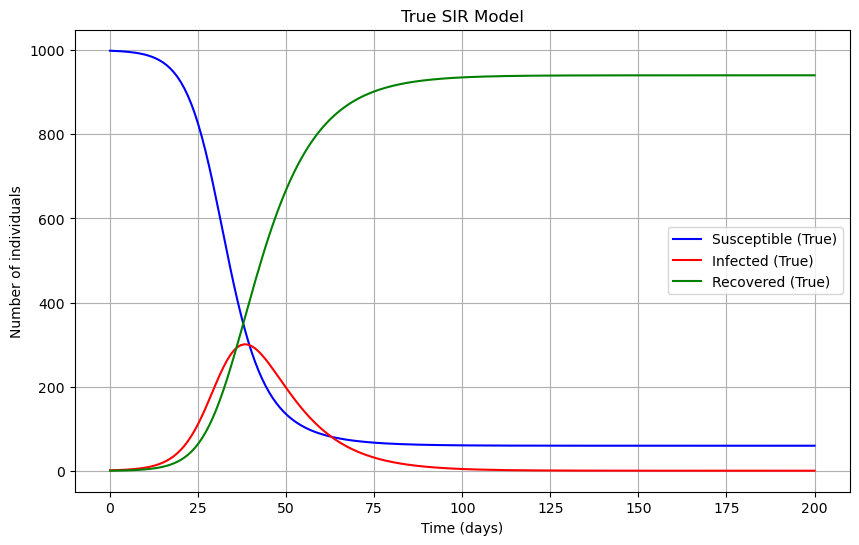

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize

# Parameters
beta_true = 0.3  # true infection rate
gamma_true = 0.1  # true recovery rate
N = 1000    # total population
I0 = 1      # initial number of infected individuals
R0 = 0      # initial number of recovered individuals
S0 = N - I0 - R0  # initial number of susceptible individuals

# True SIR model differential equations
def true_sir(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Time vector
t = np.linspace(0, 200, 200)  # 200 days

# Generate true epidemic data
y_true = odeint(true_sir, [S0, I0, R0], t, args=(beta_true, gamma_true))
S_true, I_true, R_true = y_true.T

# Plot the true epidemic data
plt.figure(figsize=(10, 6))
plt.plot(t, S_true, 'b', label='Susceptible (True)')
plt.plot(t, I_true, 'r', label='Infected (True)')
plt.plot(t, R_true, 'g', label='Recovered (True)')
plt.title('True SIR Model')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# Function to calculate sum of squared errors (SSE)
def sir_model_loss(params, t, data):
    beta, gamma = params
    N = 1000  # total population
    I0 = 1    # initial number of infected individuals
    R0 = 0    # initial number of recovered individuals
    S0 = N - I0 - R0  # initial number of susceptible individuals
    
    # SIR model differential equations
    def sir(y, t, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt
    
    # Integrate the SIR equations over the time grid t
    y_model = odeint(sir, [S0, I0, R0], t, args=(beta, gamma))
    I_model = y_model[:, 1]  # get the simulated number of infected individuals
    
    # Calculate sum of squared errors (SSE)
    return np.sum((I_model - data) ** 2)


Fitted beta: 0.300
Fitted gamma: 0.100


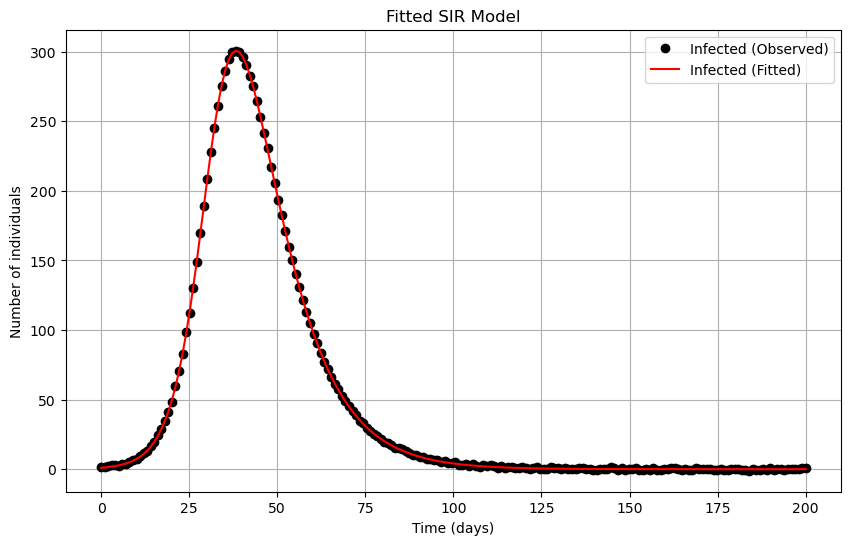

In [9]:
# Generate synthetic observed data with noise
np.random.seed(0)
noise_level = 0.5
I_observed = I_true + np.random.normal(0, noise_level, len(t))

# Fit the model parameters
initial_guess = [0.2, 0.1]  # initial guess for beta and gamma
result = minimize(sir_model_loss, initial_guess, args=(t, I_observed), method='L-BFGS-B')
beta_fit, gamma_fit = result.x

print(f"Fitted beta: {beta_fit:.3f}")
print(f"Fitted gamma: {gamma_fit:.3f}")

# Simulate the SIR model with the fitted parameters
y_fit = odeint(true_sir, [S0, I0, R0], t, args=(beta_fit, gamma_fit))
S_fit, I_fit, R_fit = y_fit.T

# Plot the observed and fitted epidemic data
plt.figure(figsize=(10, 6))
plt.plot(t, I_observed, 'ko', label='Infected (Observed)')
plt.plot(t, I_fit, 'r-', label='Infected (Fitted)')
plt.title('Fitted SIR Model')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.grid(True)
plt.show()
